<a href="https://colab.research.google.com/github/Elixirman/Flexi_Gen_AI_DS/blob/main/LineaReg_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Information

Explore the fascinating world of housing price prediction with this synthetic dataset. Perfect for data science enthusiasts, machine learning practitioners, and Kaggle learners, this dataset offers a diverse collection of features, including square footage, bedrooms, bathrooms, neighborhood types, and the year of construction. Immerse yourself in the challenge of predicting house prices and enhance your skills in regression analysis.

# Attribute Information

# Dependencies

In [ ]:
!pip install pandas numpy seaborn matplotlib scikit-learn statsmodels


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, make_scorer
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis, gaussian_kde
%matplotlib inline
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Data Importation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/FlexiSaF/housing_price_dataset.csv")

# Data Head

In [ ]:
# Preview Datahead
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


# SID-Analysis

## Shape

In [ ]:
df.shape

(50000, 6)

## Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


## De-Stats

In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


# Data Preprocessing

## Numerical Vs Categorical

In [ ]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

# Display numerical and categorical variables
print("Numerical Variables:")
print(numerical_vars)
print()

print("Categorical Variables:")
print(categorical_vars)

Numerical Variables:
Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price'], dtype='object')

Categorical Variables:
Index(['Neighborhood'], dtype='object')


## Missing Data

In [ ]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

# EDA

## Distribution Plot

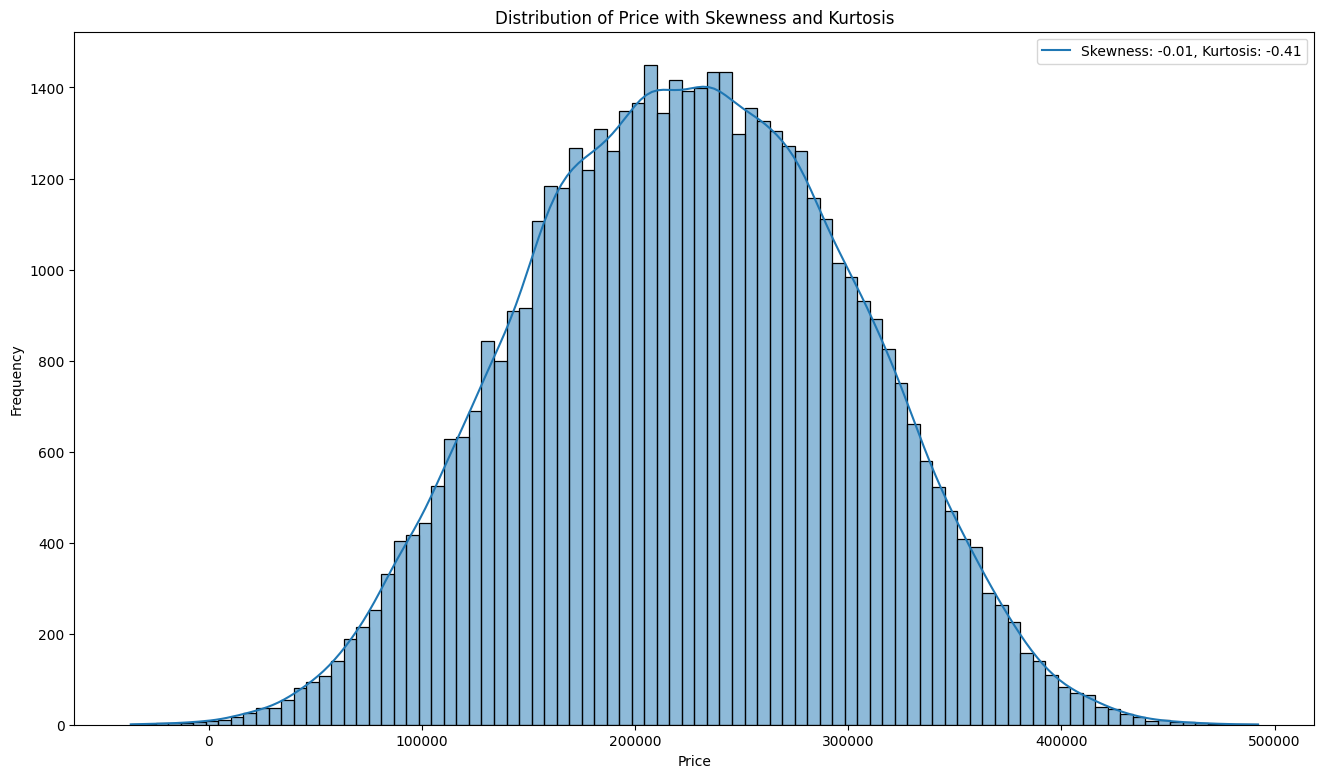

In [ ]:
# Plotting
plt.figure(figsize=(16, 9))

# Using seaborn's histplot with kde=True to plot the distribution
bar = sns.histplot(df["Price"], kde=True)

# Calculating skewness and kurtosis
skewness = df["Price"].skew()
kurtosis = df["Price"].kurt()

# Adding skewness and kurtosis to the legend
bar.legend(["Skewness: {:.2f}, Kurtosis: {:.2f}".format(skewness, kurtosis)])

# Adding title and labels
plt.title('Distribution of Price with Skewness and Kurtosis')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

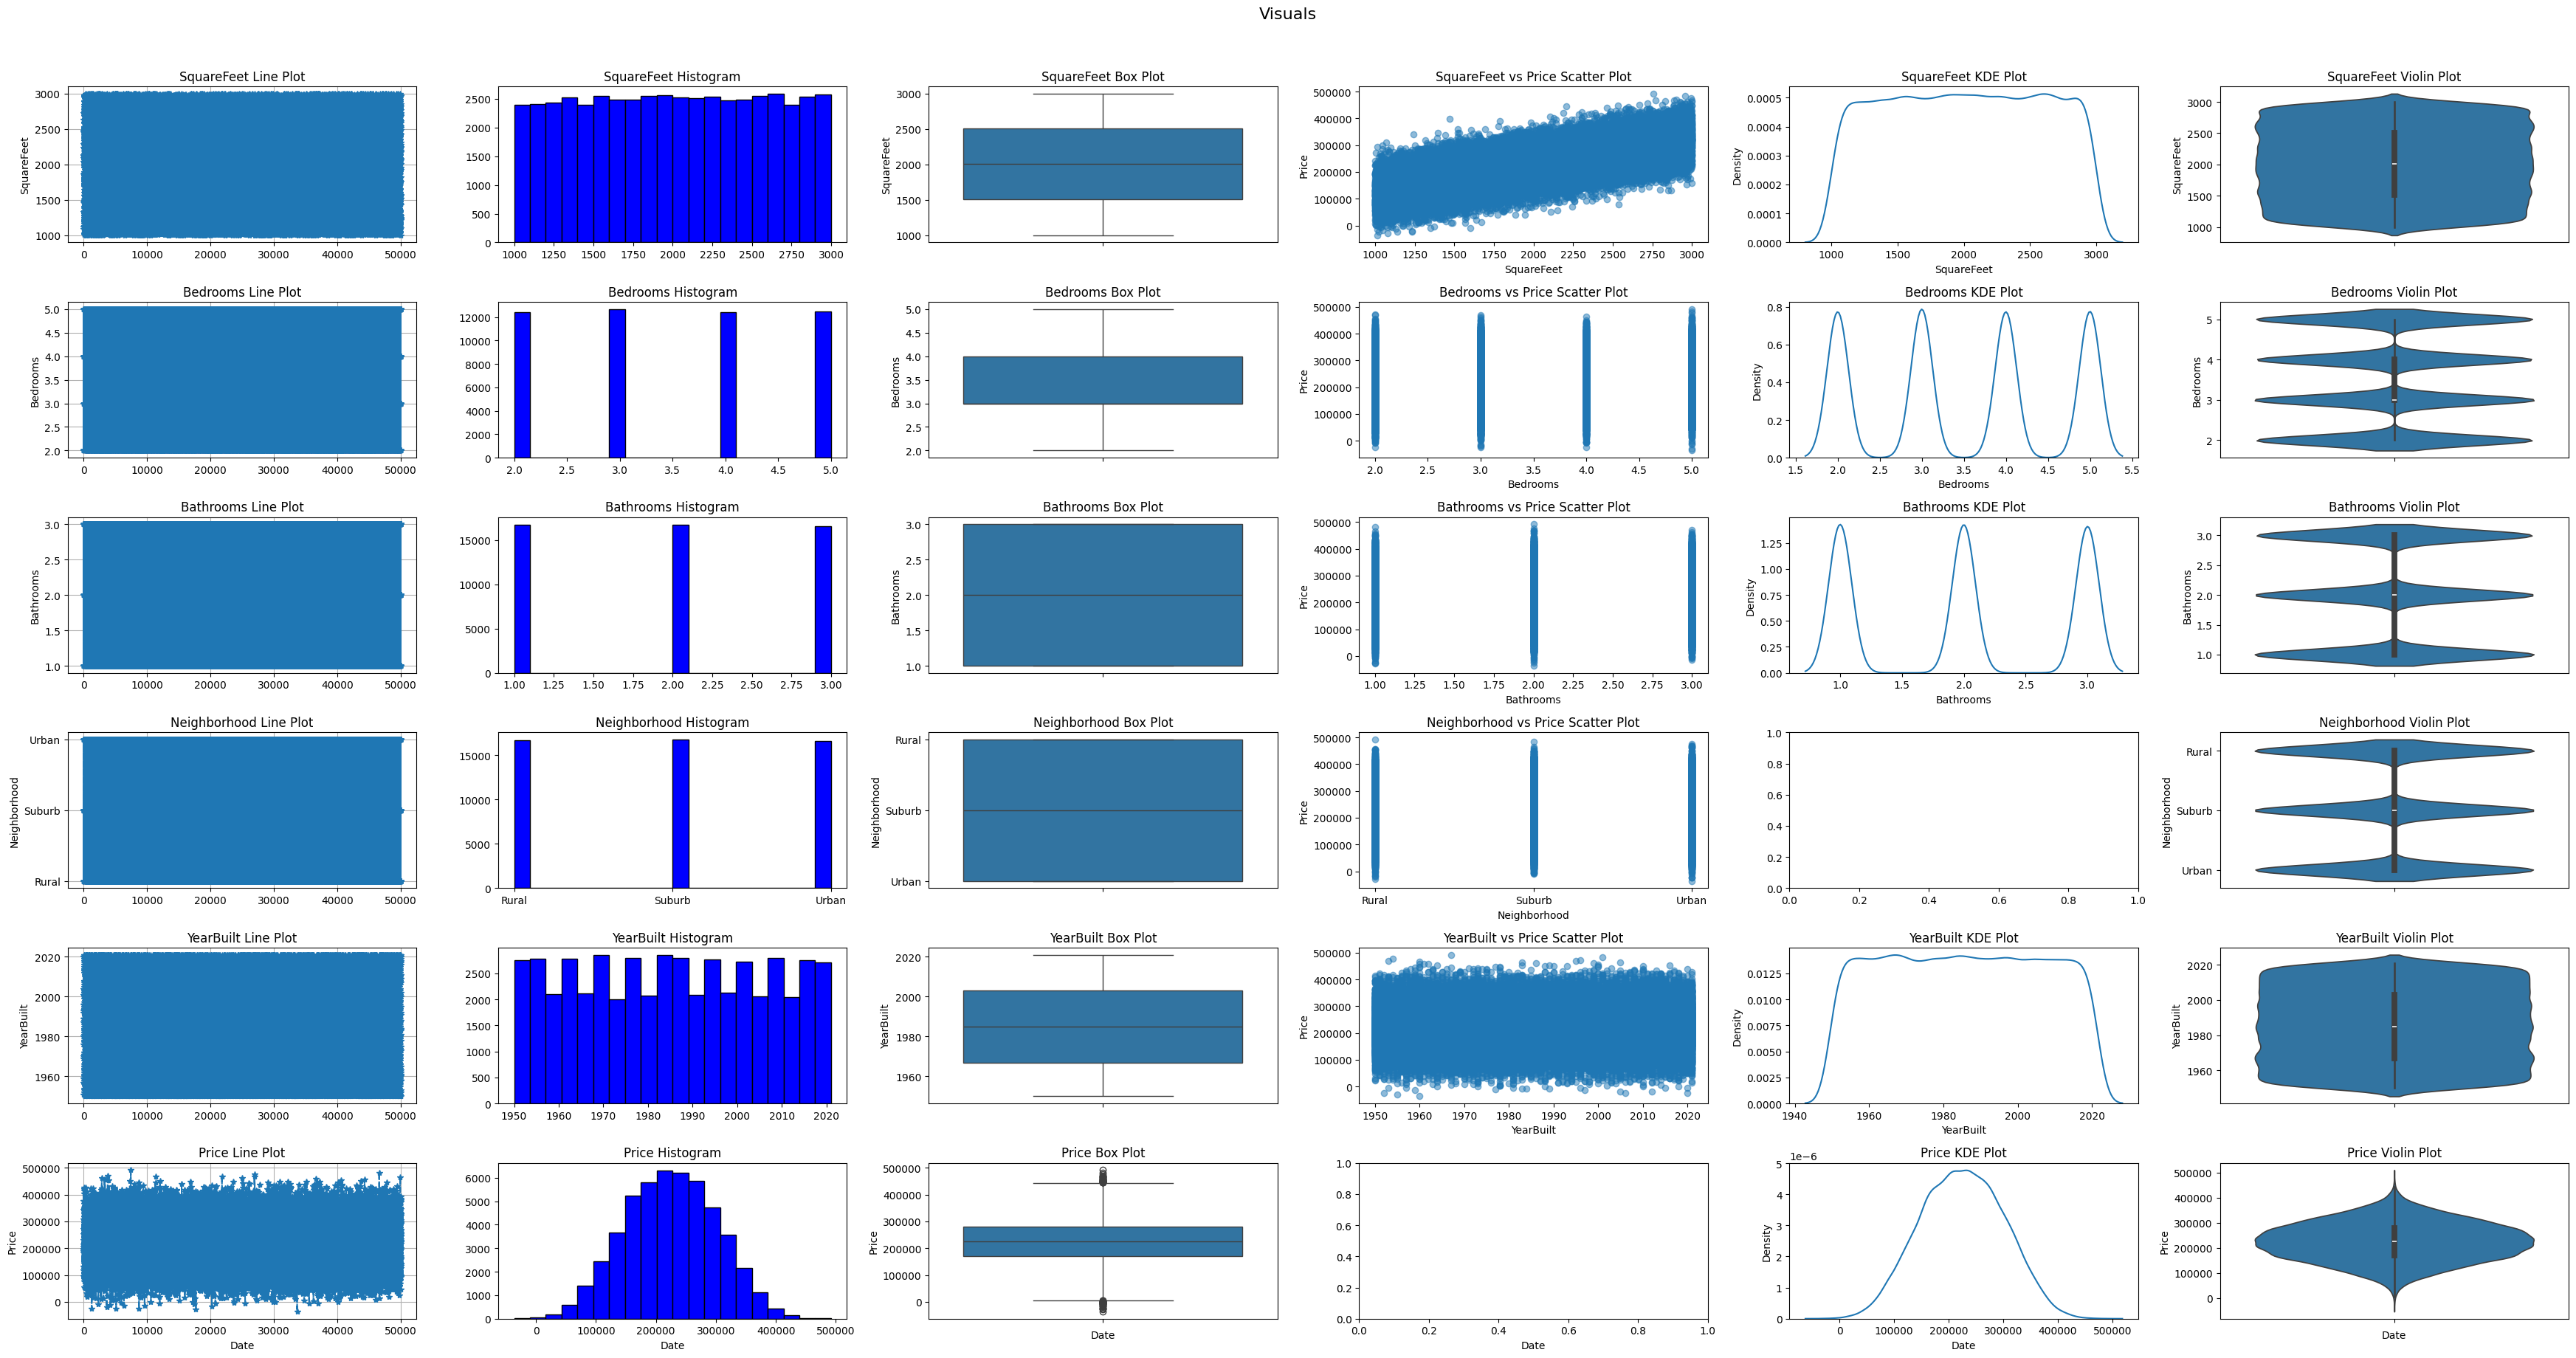

In [ ]:
# Columns to plot
columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']

# Create subplots for different types of graphs
fig, axes = plt.subplots(len(columns), 6, figsize=(35, 18))
fig.suptitle('Visuals', fontsize=16, y=1.02)

for i, col in enumerate(columns):
    # Line Plot
    axes[i, 0].plot(df.index, df[col], '--', marker='*')
    axes[i, 0].set_title(f'{col} Line Plot')
    axes[i, 0].set_ylabel(col)
    axes[i, 0].grid(True)

    # Histogram
    axes[i, 1].hist(df[col].dropna(), bins=20, color='blue', edgecolor='black')
    axes[i, 1].set_title(f'{col} Histogram')

    # Box Plot
    sns.boxplot(y=df[col].dropna(), ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} Box Plot')

    # Scatter Plot against Price (if different from Price)
    if col != 'Price':
        axes[i, 3].scatter(df[col], df['Price'], alpha=0.5)
        axes[i, 3].set_title(f'{col} vs Price Scatter Plot')
        axes[i, 3].set_xlabel(col)
        axes[i, 3].set_ylabel('Price')

    # KDE Plot
    if col != 'Neighborhood':  # Skip KDE for categorical column
        sns.kdeplot(df[col].dropna(), ax=axes[i, 4])
        axes[i, 4].set_title(f'{col} KDE Plot')

    # Violin Plot
    sns.violinplot(y=df[col].dropna(), ax=axes[i, 5])
    axes[i, 5].set_title(f'{col} Violin Plot')

# Set x-label for the last row of plots
for ax in axes[-1, :]:
    ax.set_xlabel('Date')

plt.tight_layout()
plt.show()


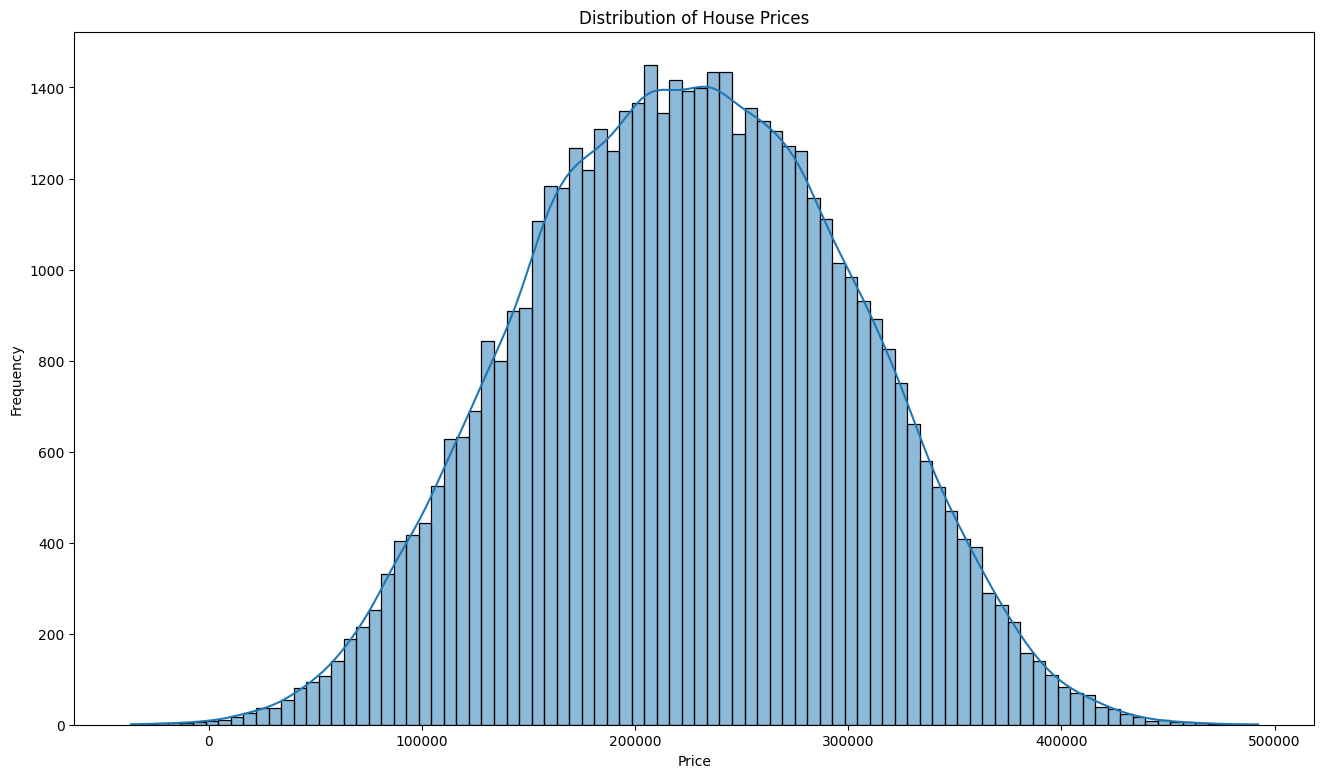

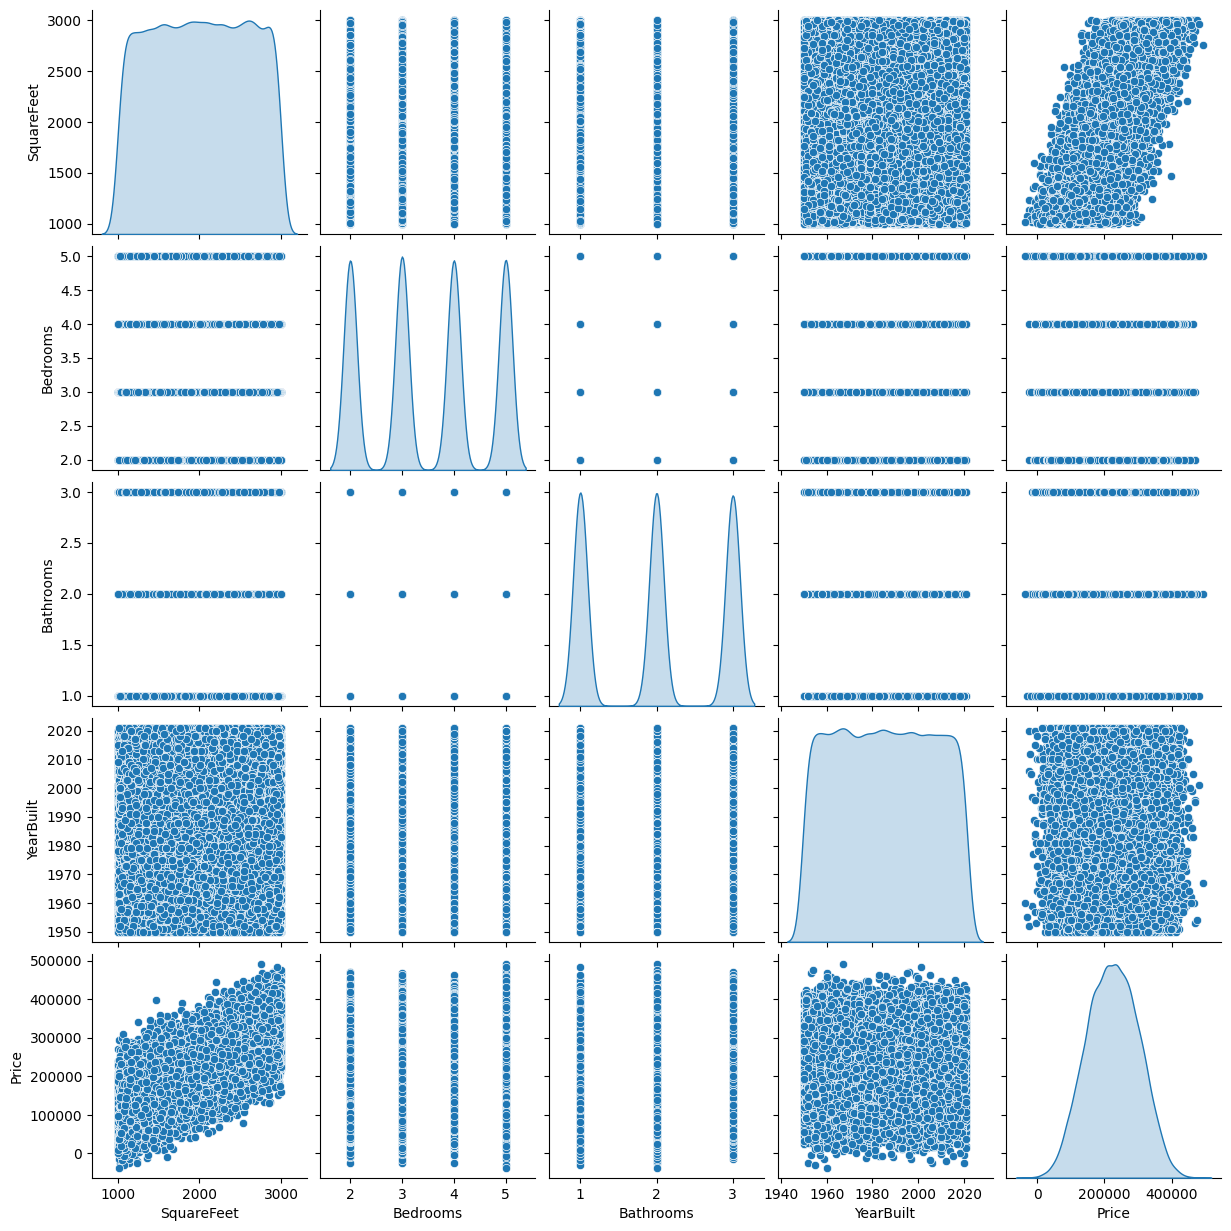

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Price
plt.figure(figsize=(16, 9))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.show()


In [ ]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


# Feature Engineering

In [ ]:
# Create a copy of the original DataFrame
dff = df.copy()

# Create a new feature "House_Age" in the copied DataFrame
dff['House_Age'] = 2024 - dff['YearBuilt']

# Convert the "Price" column to 2 decimal places in the copied DataFrame
dff['Price'] = dff['Price'].round(2)



In [ ]:
dff.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,House_Age
0,2126,4,1,Rural,1969,215355.28,55
1,2459,3,2,Rural,1980,195014.22,44
2,1860,2,1,Suburb,1970,306891.01,54
3,2294,2,1,Urban,1996,206786.79,28
4,2130,5,2,Suburb,2001,272436.24,23


## Feature Classification

In [ ]:
#Split Data into Features Independent-(X) and Target Dependent-(Y)
X = dff.drop(columns=["Price"])
Y = dff[["Price"]]

In [ ]:
# Preview X Head
X.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,House_Age
0,2126,4,1,Rural,1969,55
1,2459,3,2,Rural,1980,44


In [ ]:
# Preview Y Head
Y.head(2)

,Price
0,215355.28
1,195014.22


# Correlation

In [ ]:
# Step 1: Create a copy of X
X_copy = X.copy()

# Step 2: Map the 'Neighborhood' column values
neighborhood_map = {'Rural': 0, 'Suburb': 1, 'Urban': 2}
X_copy['Neighborhood'] = X_copy['Neighborhood'].map(neighborhood_map)




In [ ]:
X_copy.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,House_Age
0,2126,4,1,0,1969,55
1,2459,3,2,0,1980,44


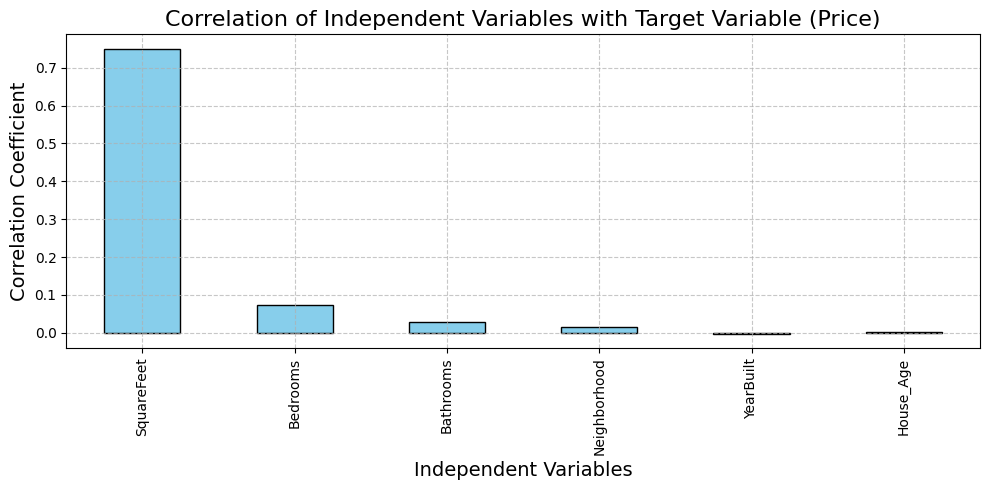

In [ ]:
# Calculate the correlation of all independent variables with the target column 'Price'
correlations = X_copy.corrwith(Y['Price'])

# Plot the correlations
plt.figure(figsize=(10, 5))
correlations.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title("Correlation of Independent Variables with Target Variable (Price)", fontsize=16)
plt.xlabel("Independent Variables", fontsize=14)
plt.ylabel("Correlation Coefficient", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


## Heatmap

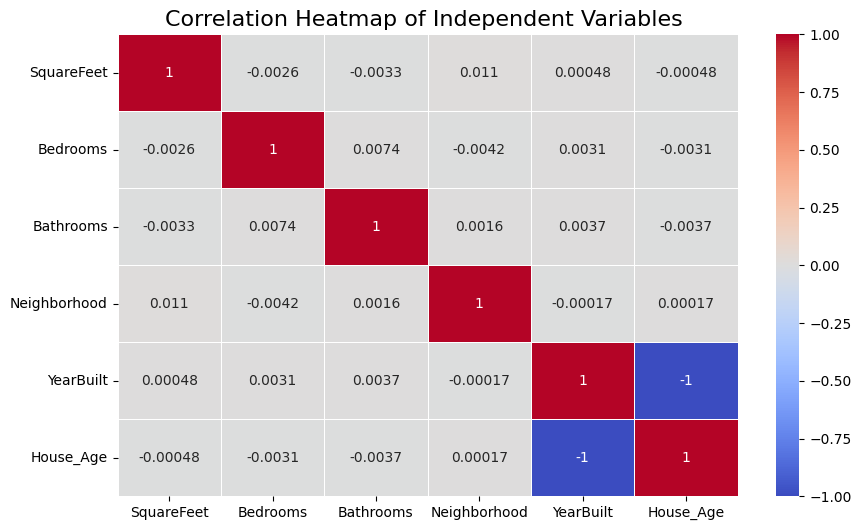

In [ ]:

# Calculate the correlation matrix
corr_matrix = X_copy.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Independent Variables ", fontsize=16)
plt.show()


## Matrix Plot

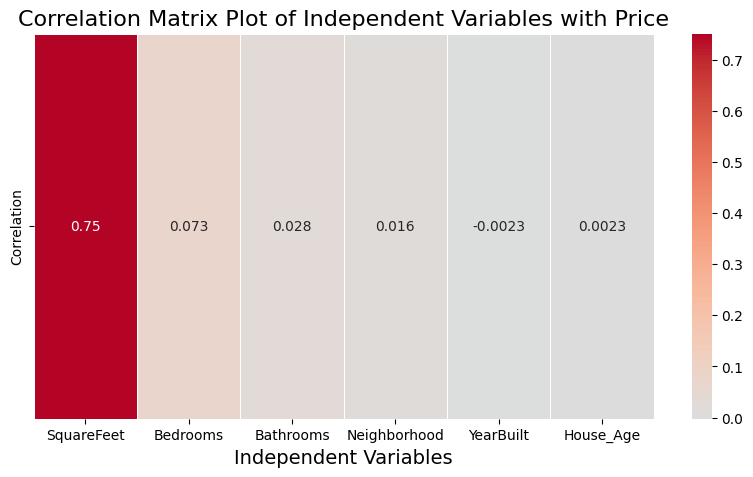

In [ ]:
# Calculate the correlation matrix
corr_matrix = X_copy.corrwith(Y['Price']).to_frame(name='Correlation')

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix.T, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix Plot of Independent Variables with Price", fontsize=16)
plt.xlabel("Independent Variables", fontsize=14)
plt.show()


## Pearsons Correlation

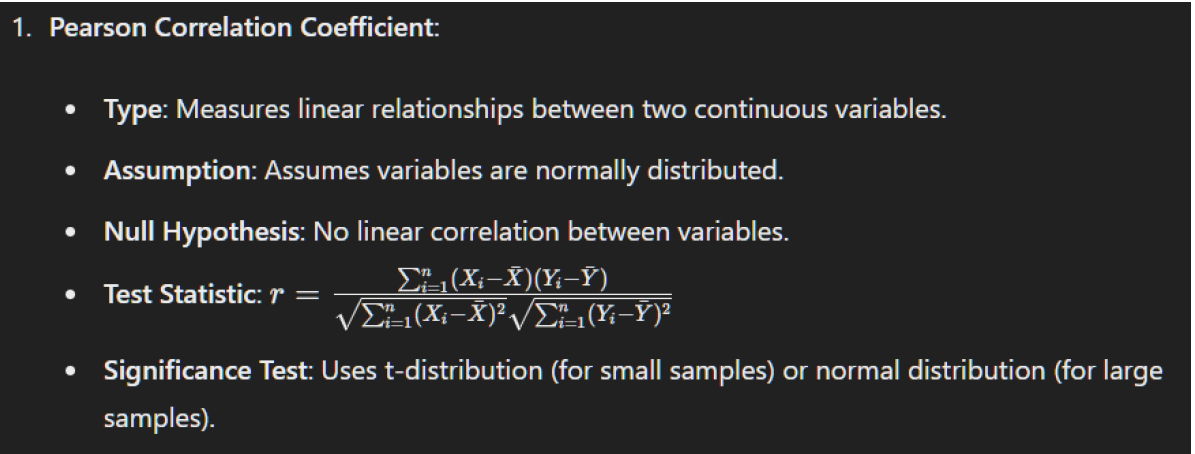

**Use Case:**

---


Use Pearson correlation when assessing linear relationships between variables with a normal distribution.

**Correlation Coefficients:**

---


Positive values indicate a positive relationship.

Negative values indicate a negative relationship.

Values closer to 1 or -1 indicate a stronger relationship.

Values closer to 0 indicate a weaker relationship.

**P-Values:**


---


Low p-values (typically < 0.05) indicate that the correlation is statistically significant.

High p-values (typically >= 0.05) suggest that the correlation is not statistically significant.

**Compute Correlation Matrix and P-Values Matrix:**


---


The correlation matrix shows the correlation coefficients between all pairs of variables.

The p-values matrix shows the p-values for the significance of these correlations.

**Interpret the Results:**


---


Look for high correlation coefficients (close to 1 or -1) and check their corresponding p-values.

If the p-value is low, the correlation is significant.

If the p-value is high, the correlation is not significant despite its magnitude.


### Correlation Test

In [ ]:
#Recall Data
dff.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,House_Age
0,2126,4,1,Rural,1969,215355.28,55
1,2459,3,2,Rural,1980,195014.22,44


In [ ]:
# Step 1: Create a copy of X
dff_m = dff.copy()

# Define the mapping dictionary
neighborhood_map = {'Rural': 0, 'Suburb': 1, 'Urban': 2}

# Replace 'Neighborhood' column values with mapped values
dff_m['Neighborhood'] = dff_m['Neighborhood'].map(neighborhood_map)


In [ ]:
dff_m.head(3)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,House_Age
0,2126,4,1,0,1969,215355.28,55
1,2459,3,2,0,1980,195014.22,44
2,1860,2,1,1,1970,306891.01,54


In [ ]:
def correlation_tests(df):


    # Get list of numeric column names
    numeric_cols = dff_m.select_dtypes(include=['float64', 'int64']).columns

    # Iterate over all combinations of numeric columns
    for i in range(len(numeric_cols)):
        for j in range(i + 1, len(numeric_cols)):
            col1 = numeric_cols[i]
            col2 = numeric_cols[j]

            # Calculate Pearson correlation coefficient and p-value
            pearson_corr, pearson_pvalue = pearsonr(df[col1], df[col2])

            # Print results for the pair of columns
            print(f"Correlation between {col1} and {col2}:")
            print(f"Pearson correlation coefficient: {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
            print()

# Example usage:
# Assuming 'df' is your DataFrame containing the columns mentioned in your Index
correlation_tests(dff_m)


Correlation between SquareFeet and Bedrooms:
Pearson correlation coefficient: -0.003 (p-value: 0.555)

Correlation between SquareFeet and Bathrooms:
Pearson correlation coefficient: -0.003 (p-value: 0.464)

Correlation between SquareFeet and Neighborhood:
Pearson correlation coefficient: 0.011 (p-value: 0.012)

Correlation between SquareFeet and YearBuilt:
Pearson correlation coefficient: 0.000 (p-value: 0.914)

Correlation between SquareFeet and Price:
Pearson correlation coefficient: 0.751 (p-value: 0.000)

Correlation between SquareFeet and House_Age:
Pearson correlation coefficient: -0.000 (p-value: 0.914)

Correlation between Bedrooms and Bathrooms:
Pearson correlation coefficient: 0.007 (p-value: 0.098)

Correlation between Bedrooms and Neighborhood:
Pearson correlation coefficient: -0.004 (p-value: 0.347)

Correlation between Bedrooms and YearBuilt:
Pearson correlation coefficient: 0.003 (p-value: 0.482)

Correlation between Bedrooms and Price:
Pearson correlation coefficient: 0

### Correlation Test Heatmap

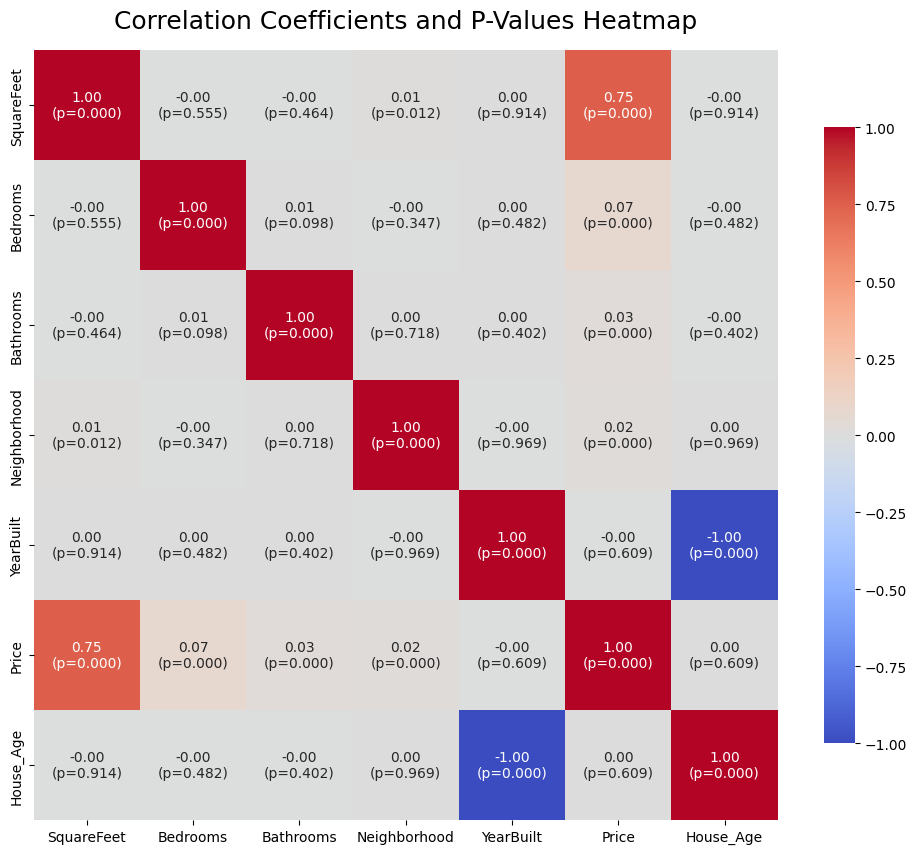

In [ ]:
# Compute correlation matrix
corr = dff_m.corr()

# Compute p-values matrix
p_values = dff_m.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(dff_m.columns))

# Create a combined DataFrame for better visualization
corr_pvalues = pd.DataFrame(index=corr.index, columns=corr.columns, data=0)

for row in corr.index:
    for col in corr.columns:
        corr_pvalues.loc[row, col] = f"{corr.loc[row, col]:.2f}\n(p={p_values.loc[row, col]:.3f})"

# Plot heatmap for combined correlation coefficients and p-values
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr, annot=corr_pvalues, fmt='', cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
heatmap.set_title('Correlation Coefficients and P-Values Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

INTERPRETATION

Interpret the Results:


---


Look for high correlation coefficients (close to 1 or -1) and check their corresponding p-values.

If the p-value is low, the correlation is significant.

If the p-value is high, the correlation is not significant despite its magnitude.


Low p-values (typically < 0.05) indicate that the correlation is statistically significant.

High p-values (typically >= 0.05) suggest that the correlation is not statistically significant.

# One Hot Encoding

In [ ]:
# Review Data head
X.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,House_Age
0,2126,4,1,Rural,1969,55
1,2459,3,2,Rural,1980,44


In [ ]:
Y.head(2)

,Price
0,215355.28
1,195014.22


Applying OHE

In [ ]:
# Apply One-Hot Encoding with integer output
X_ohe = pd.get_dummies(X, columns=['Neighborhood'], dtype=int)


In [ ]:
# Display the new DataFrame with One-Hot Encoded columns
X_ohe.head(2)

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,House_Age,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,55,1,0,0
1,2459,3,2,1980,44,1,0,0


# Data Splitting

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split (X_ohe, Y, test_size= 0.2, random_state= 0)

# Standardization(Feature Scaling)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert the scaled arrays back to DataFrames
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)



Preview Head

In [ ]:
# Display the scaled training DataFrame
print("Scaled Training DataFrame:")
x_train_scaled_df.head(2)



Scaled Training DataFrame:


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,House_Age,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,-0.428875,1.342637,0.002939,-1.129943,1.129943,-0.706338,1.411064,-0.706298
1,-0.046788,0.446919,-1.221689,0.028438,-0.028438,1.415753,-0.708685,-0.706298


In [ ]:
# Display the scaled testing DataFrame
print("Scaled Testing DataFrame:")
x_test_scaled_df.head(2)

Scaled Testing DataFrame:


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,House_Age,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,0.875430,-0.448800,0.002939,-1.660868,1.660868,1.415753,-0.708685,-0.706298
1,-1.736652,0.446919,0.002939,-1.274741,1.274741,1.415753,-0.708685,-0.706298


# Modelling

## Model Initialization

In [ ]:
#Initialize Regression Model
regression = LinearRegression(n_jobs= -1)

## Model Training

In [ ]:
 # Train the Model on Training Data
regression.fit(x_train_scaled_df, y_train)


LinearRegression(n_jobs=-1)

## Slope/Coefficient & Intercept

In [ ]:
#finding the coefficient/Slope
regression.coef_

array([[57067.21229934,  5602.50665988,  2557.32601612,   -65.06524459,
           65.06524459,  -141.68005929,  -426.06990981,   568.23136599]])

In [ ]:
#Calculating intercept
regression.intercept_

array([224980.48735625])

## Best Line Fit

In [ ]:
"""
#Scatter Plot
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_test_train))
#Best fit Line (Intercept)

SyntaxError: incomplete input (<ipython-input-47-9ac1f3dabf50>, line 1)

## Model Prediction


Prediction Theory


---

Y = mX + C

Y = Prediction/Output

m = Slope/Coefficient

X = X_test

c = Intercept

Output =


---



In [ ]:
y_train_pred = regression.predict(x_train_scaled_df)  # Predictions on the training set
y_test_pred = regression.predict(x_test_scaled_df)    # Predictions on the test set


In [ ]:
y_train_pred

array([[207280.02270434],
       [221386.35626861],
       [218294.17123314],
       ...,
       [227877.18936379],
       [285032.50089671],
       [192653.47896874]])

In [ ]:
y_test_pred

array([[272348.09363334],
       [128251.86273453],
       [279761.23670278],
       ...,
       [123826.63467087],
       [286656.12269249],
       [184333.24902818]])

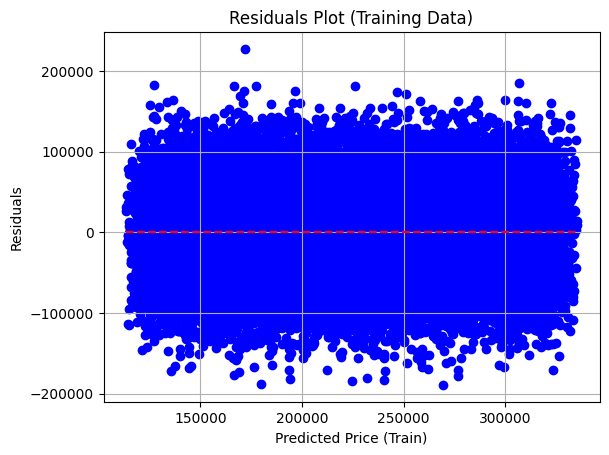

In [ ]:
# Residuals plot for training data
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, color='blue')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Price (Train)')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Training Data)')
plt.grid(True)
plt.show()


## Model Evaluation

In [ ]:
# MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# RMSE
rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

# R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Explained Variance Score
explained_variance_train = explained_variance_score(y_train, y_train_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)

print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Train R²: {r2_train:.2f}")
print(f"Test R²: {r2_test:.2f}")
print(f"Train Explained Variance: {explained_variance_train:.2f}")
print(f"Test Explained Variance: {explained_variance_test:.2f}")


Train MAE: 39807.97
Test MAE: 40259.57
Train MSE: 2485560336.39
Test MSE: 2516298193.94
Train RMSE: 49855.39
Test RMSE: 50162.72
Train R²: 0.57
Test R²: 0.57
Train Explained Variance: 0.57
Test Explained Variance: 0.57


# Other Models

## Model Dictionary

In [ ]:
# Define a dictionary of models
models = {

    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}


In [ ]:
# Split the data
x_train, x_test,  y_train, y_test = train_test_split (X_ohe, Y, test_size= 0.2, random_state= 0)

## Model Evaluation

In [ ]:
# Evaluate each model
for name, model in models.items():
    model.fit(x_train_scaled_df, y_train)
    y_pred_train = model.predict(x_train_scaled_df)
    y_pred_test = model.predict(x_test_scaled_df)

    print(f"Model: {name}")
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"Train MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
    print(f"Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
    print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.2f}")
    print(f"Train R²: {r2_score(y_train, y_pred_train):.2f}")
    print(f"Test R²: {r2_score(y_test, y_pred_test):.2f}")
    print("-" * 30)

Model: Ridge Regression
Train MAE: 39807.97
Test MAE: 40259.60
Train MSE: 2485560338.45
Test MSE: 2516300024.86
Train RMSE: 49855.39
Test RMSE: 50162.74
Train R²: 0.57
Test R²: 0.57
------------------------------
Model: Lasso Regression
Train MAE: 39807.97
Test MAE: 40259.58
Train MSE: 2485560341.38
Test MSE: 2516299087.77
Train RMSE: 49855.39
Test RMSE: 50162.73
Train R²: 0.57
Test R²: 0.57
------------------------------
Model: ElasticNet
Train MAE: 42675.20
Test MAE: 43302.17
Train MSE: 2851660207.87
Test MSE: 2903859239.33
Train RMSE: 53400.94
Test RMSE: 53887.47
Train R²: 0.51
Test R²: 0.50
------------------------------
Model: Decision Tree
Train MAE: 193.18
Test MAE: 58234.00
Train MSE: 7140028.26
Test MSE: 5311037098.58
Train RMSE: 2672.08
Test RMSE: 72876.86
Train R²: 1.00
Test R²: 0.09
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Random Forest
Train MAE: 15778.20
Test MAE: 42455.34
Train MSE: 397420456.32
Test MSE: 2811557746.68
Train RMSE: 19935.41
Test RMSE: 53024.12
Train R²: 0.93
Test R²: 0.52
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Gradient Boosting
Train MAE: 39573.05
Test MAE: 40328.37
Train MSE: 2457698158.01
Test MSE: 2524003826.93
Train RMSE: 49575.18
Test RMSE: 50239.46
Train R²: 0.57
Test R²: 0.57
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoost
Train MAE: 40028.65
Test MAE: 40503.46
Train MSE: 2512837796.62
Test MSE: 2550566521.40
Train RMSE: 50128.21
Test RMSE: 50503.13
Train R²: 0.57
Test R²: 0.56
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVR
Train MAE: 61324.74
Test MAE: 61938.23
Train MSE: 5657393631.56
Test MSE: 5734759418.57
Train RMSE: 75215.65
Test RMSE: 75728.19
Train R²: 0.02
Test R²: 0.02
------------------------------
Model: KNN
Train MAE: 35771.62
Test MAE: 43905.06
Train MSE: 2012754690.40
Test MSE: 3009002442.48
Train RMSE: 44863.73
Test RMSE: 54854.37
Train R²: 0.65
Test R²: 0.49
------------------------------


## Cross Evaluation

In [ ]:
# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Define the scoring metrics
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_ohe, Y, test_size=0.2, random_state=0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert the scaled arrays back to DataFrames
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Number of folds for cross-validation
cv_folds = 5

# Perform cross-validation and evaluate each model
for name, model in models.items():
    print(f"Model: {name}")

    for metric_name, scorer in scoring.items():
        scores = cross_val_score(model, x_train_scaled_df, y_train, cv=cv_folds, scoring=scorer)
        mean_score = -scores.mean() if metric_name in ['MAE', 'MSE', 'RMSE'] else scores.mean()

        print(f"Cross-validated {metric_name}: {mean_score:.2f}")

    print("-" * 30)


Model: Linear Regression
Cross-validated MAE: 39815.34
Cross-validated MSE: 2486533197.99
Cross-validated RMSE: 49864.18
Cross-validated R2: 0.57
------------------------------
Model: Ridge Regression
Cross-validated MAE: 39815.56
Cross-validated MSE: 2486530493.64
Cross-validated RMSE: 49864.15
Cross-validated R2: 0.57
------------------------------
Model: Lasso Regression
Cross-validated MAE: 39815.56
Cross-validated MSE: 2486530373.38
Cross-validated RMSE: 49864.15
Cross-validated R2: 0.57
------------------------------
Model: ElasticNet
Cross-validated MAE: 42680.66
Cross-validated MSE: 2852527716.10
Cross-validated RMSE: 53408.13
Cross-validated R2: 0.51
------------------------------
Model: Decision Tree
Cross-validated MAE: 58112.47
Cross-validated MSE: 5280634476.76
Cross-validated RMSE: 72688.89
Cross-validated R2: 0.09
------------------------------
Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated MAE: 42515.97


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated MSE: 2821978080.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated RMSE: 53133.60


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R2: 0.51
------------------------------
Model: Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Cross-validated MAE: 39873.61


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Cross-validated MSE: 2494535298.70


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Cross-validated RMSE: 49944.46


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Cross-validated R2: 0.57
------------------------------
Model: AdaBoost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated MAE: 40137.70


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated MSE: 2528570499.79


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated RMSE: 50266.16


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated R2: 0.56
------------------------------
Model: SVR


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated MAE: 61471.81


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated MSE: 5682252131.08


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated RMSE: 75379.94


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated R2: 0.02
------------------------------
Model: KNN
Cross-validated MAE: 43831.58
Cross-validated MSE: 3013563795.81
Cross-validated RMSE: 54895.69
Cross-validated R2: 0.48
------------------------------


# Model Enhancement

## Feature Selection

In [ ]:

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=3)

# Fit RFE
rfe.fit(x_train_scaled_df, y_train)

# Get selected features
selected_features = x_train_scaled_df.columns[rfe.support_]
print("Selected features:", selected_features)

# Update train and test data with selected features
x_train_selected = x_train_scaled_df[selected_features]
x_test_selected = x_test_scaled_df[selected_features]


Selected features: Index(['SquareFeet', 'Bedrooms', 'Neighborhood_Urban'], dtype='object')


## Model-E-CV-HT

Model Evaluation with Cross-Validation and Hyperparameter Tuning

In [ ]:
"""
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
"""

# Define a dictionary of models

models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Define the parameter grid for each model
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.1, 1, 10, 100]},
    'ElasticNet': {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Decision Tree': {'max_depth': [5, 10, 15, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]},
    'Gradient Boosting': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]},
    'AdaBoost': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]},
    'SVR': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]}
}

# Perform Grid Search
for name, model in models.items():
    print(f"Model: {name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train_selected, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    # Evaluate the best model
    y_pred = best_model.predict(x_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print("-" * 30)


Model: Ridge Regression
Best parameters: {'alpha': 1}
MAE: 40251.35
MSE: 2516819251.11
RMSE: 50167.91
R²: 0.57
------------------------------
Model: Lasso Regression
Best parameters: {'alpha': 1}
MAE: 40251.35
MSE: 2516819636.54
RMSE: 50167.91
R²: 0.57
------------------------------
Model: ElasticNet
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
MAE: 40264.28
MSE: 2517858740.22
RMSE: 50178.27
R²: 0.57
------------------------------
Model: Decision Tree
Best parameters: {'max_depth': 5}
MAE: 40411.37
MSE: 2539670628.29
RMSE: 50395.14
R²: 0.57
------------------------------
Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi